In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

Recall that in PHYS 207, you were often asked to plot displacement as a function of time. For example, for a baseball thrown directly upward you would plot $y(t)$, and for a block on a horizontal spring you would plot $x(t)$. Here we will examine how the displacement and time axes "scissor together" at relativistic speeds.

The convention in relativity is to reverse the axes: $ct$ is vertical and $x$ is horizontal. Time moves forward from the bottom to the top of the plot:

(-1.0, 1.0, -1.0, 1.0)

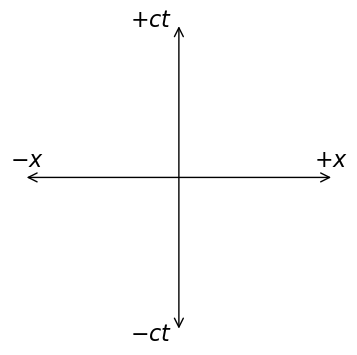

In [2]:
plt.figure(figsize=(4,4))
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.annotate(text='', xy=(-1,0), xytext=(1,0), arrowprops=dict(arrowstyle='<->'))
plt.annotate(text='', xy=(0,-1), xytext=(0,1), arrowprops=dict(arrowstyle='<->'))
plt.text(0.98, 0.04, r"$+x$", horizontalalignment='center', verticalalignment='bottom')
plt.text(-0.98, 0.04, r"$-x$", horizontalalignment='center', verticalalignment='bottom')
plt.text(-0.04, 1.02, r"$+ct$", horizontalalignment='right', verticalalignment='center')
plt.text(-0.04, -1.02, r"$-ct$", horizontalalignment='right', verticalalignment='center')
plt.axis('off')

Imagine that frame $K^{\prime}$ is moving in the $+x$ direction at speed $v$ relative to frame $K$. You are at rest in frame $K$. Let's figure out how the set of $(x^{\prime}, ct^{\prime})$ axes would look to you when the frames' origins $O$ and $O^{\prime}$ coincide.

<ol>
    <li>Use the fact that $x^{\prime} = 0$ on the $ct^{\prime}$ axis to define a line $ct(x)$ in frame $K$ that follows the $ct^{\prime}$ axis. Write a function that computes points on the line. $v$ will be one of your function inputs.</li>
</ol>

In [5]:
def ctx_ctprime(v,x):
    """Defining position of ct' in relation to ct"""
    gamma = np.sqrt(1/(1 - ((v**2)/((constants.c)**2))))
    ct_x = ((gamma * v * x)/(constants.c)) * ((1 - gamma)/((gamma**2) - 1))
    return ct_x

<ol start=2>
    <li>Use the fact that $ct^{\prime} = 0$ on the $x^{\prime}$ axis to define a line $ct(x)$ that traces the $x^{\prime}$ axis in frame $K$. Write a second function that computes points on this line.</li>
</ol>

In [11]:
def ctx_xprime(v,x):
    """Defining position of x' in relation to ct"""
    gamma = np.sqrt(1/(1 - ((v**2)/((constants.c)**2))))
    ct_x = ((gamma * x)/(gamma + 1)) * ((gamma * ((v**2)/(constants.c**2)) * ((2 * gamma) + 1)) + 1)
    return ct_x

<ol start=3>
    <li>The code below creates a figure with centered $(x, ct)$ axes that have range $(-10^{10}, 10^{10})$ m. We are using $ct$ instead of just $t$ on our vertical axis so that both axes have the same units. Use your functions from problems 1 and 2 to overplot the $ct^{\prime}$ and $x^{\prime}$ axes <strong>as a function of $x$</strong> for $v = 0.2c$. Make your $ct^{\prime}$ and $x^{\prime}$ axes red, and label them in red. Also add black labels to the $(x, ct)$ axes giving the coordinate name ($x$ or $ct$) and the units.</li>
</ol>

Text(-12000000000.0, 1200000000.0, "-x' [10^10 m]")

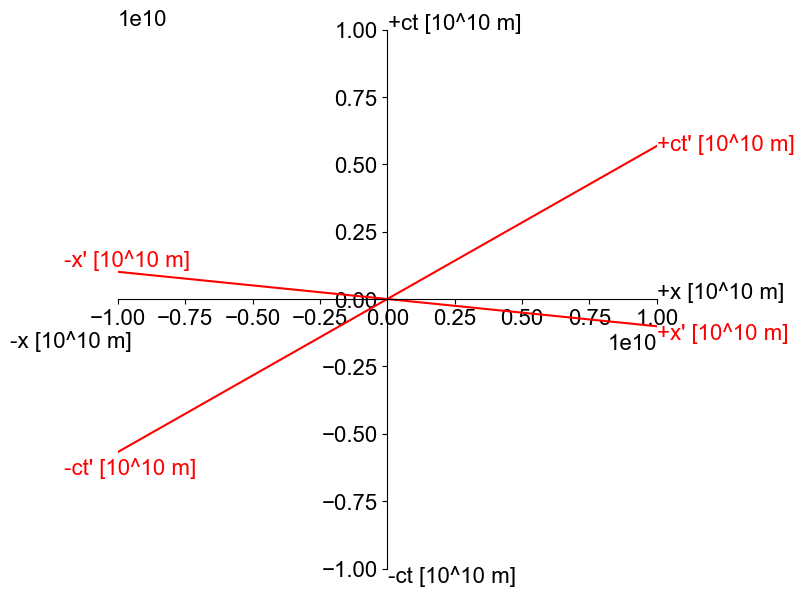

In [13]:
# Set up an array of independent variables x that spans (-1e10, 1e10) m
x = np.linspace(0, 2e10, num=201, endpoint=True) - 1e10

# Make a figure
fig, ax = plt.subplots(figsize=(7,7))

# YOUR CODE HERE: Use ax.plot() to plot the ct' and x' axes below
v = 0.2 * constants.c
ax.plot(x,ctx_ctprime(v,x), color='red')
ax.plot(x,ctx_xprime(v,x), color='red')

# Move the left and bottom "spines" (borders of the plot) to the center
# This makes a math textbook-like set of (x,ct) axes instead of a box around the plot
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Take out the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make the two axes have the same scale
ax.set_aspect('equal')

# Set the axes ranges
ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

# YOUR CODE HERE: Use ax.text() to add RED labels to the ct' and x' axes below
ax.text(0.001e10,1e10,'+ct [10^10 m]', color='black')
ax.text(0.001e10,-1.05e10,'-ct [10^10 m]', color='black')
ax.text(1e10,0.001e10,'+x [10^10 m]', color='black')
ax.text(-1.4e10,-0.18e10,'-x [10^10 m]', color='black')
ax.text(1e10,0.55e10,'+ct\' [10^10 m]', color='red')
ax.text(-1.2e10,-0.65e10,'-ct\' [10^10 m]', color='red')
ax.text(1e10,-0.15e10,'+x\' [10^10 m]', color='red')
ax.text(-1.2e10,0.12e10,'-x\' [10^10 m]', color='red')

<ol start=4>
    <li>Make a figure that plots $ct^{\prime}$ and $x^{\prime}$ axes for $v = 0.25c$, $v = 0.5c$, and $v = 0.75c$. Use different colors for each pair of axes. Make a legend that shows which value of $v$ corresponds to each color. Label the $(x, ct)$ axes and add units.</li>
</ol>

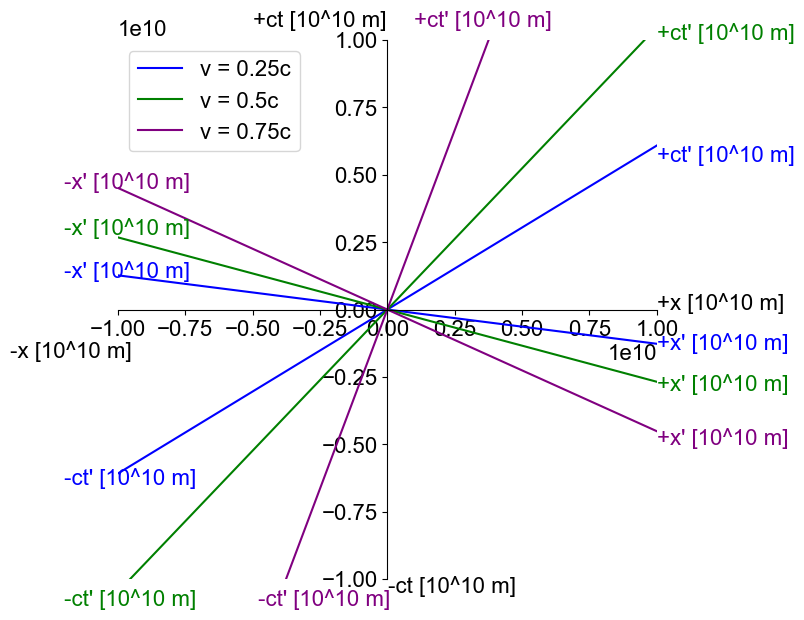

In [15]:
# Plot here. You may copy syntax from the previous cell.
# Set up an array of independent variables x that spans (-1e10, 1e10) m
x = np.linspace(0, 2e10, num=201, endpoint=True) - 1e10

# Make a figure
fig, ax = plt.subplots(figsize=(7,7))

# YOUR CODE HERE: Use ax.plot() to plot the ct' and x' axes below
v1 = 0.25 * constants.c
v2 = 0.5 * constants.c
v3 = 0.75 * constants.c
#ct and x listed below are ct' and x' -> left out for convenience!
ct1 = ax.plot(x,ctx_ctprime(v1,x), color='blue', label='v = 0.25c')
x1 = ax.plot(x,ctx_xprime(v1,x), color='blue')
ct2 = ax.plot(x,ctx_ctprime(v2,x), color='green', label='v = 0.5c')
x2 = ax.plot(x,ctx_xprime(v2,x), color='green')
ct3 = ax.plot(x,ctx_ctprime(v3,x), color='purple', label='v = 0.75c')
x3 = ax.plot(x,ctx_xprime(v3,x), color='purple')

# Move the left and bottom "spines" (borders of the plot) to the center
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Take out the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make the two axes have the same scale
ax.set_aspect('equal')

# Set the axes ranges
ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

# YOUR CODE HERE: Use ax.text() to add RED labels to the ct' and x' axes below
ax.text(-0.5e10,1.05e10,'+ct [10^10 m]', color='black')
ax.text(0.001e10,-1.05e10,'-ct [10^10 m]', color='black')
ax.text(1e10,0.001e10,'+x [10^10 m]', color='black')
ax.text(-1.4e10,-0.18e10,'-x [10^10 m]', color='black')
ax.text(1e10,0.55e10,'+ct\' [10^10 m]', color='blue')
ax.text(-1.2e10,-0.65e10,'-ct\' [10^10 m]', color='blue')
ax.text(1e10,-0.15e10,'+x\' [10^10 m]', color='blue')
ax.text(-1.2e10,0.12e10,'-x\' [10^10 m]', color='blue')
ax.text(1e10,1e10,'+ct\' [10^10 m]', color='green')
ax.text(-1.2e10,-1.1e10,'-ct\' [10^10 m]', color='green')
ax.text(1e10,-0.3e10,'+x\' [10^10 m]', color='green')
ax.text(-1.2e10,0.28e10,'-x\' [10^10 m]', color='green')
ax.text(0.1e10,1.05e10,'+ct\' [10^10 m]', color='purple')
ax.text(-0.48e10,-1.1e10,'-ct\' [10^10 m]', color='purple')
ax.text(1e10,-0.5e10,'+x\' [10^10 m]', color='purple')
ax.text(-1.2e10,0.45e10,'-x\' [10^10 m]', color='purple')

#Legend
ax.legend()

<ol start=5>
    <li>Connect your graph from problem 4 with the discussion of world lines in Chapter 2 of your textbook. What kind of world line do your $(x^{\prime}, ct^{\prime})$ axes approach as $v \rightarrow c$? Create a similar plot to problem 4, but this time plot $(x^{\prime}, ct^{\prime})$ axes for $v = 0.5, 0.75, 0.875, 0.9375$. To illustrate the concept of taking a limit as $v \rightarrow c$, make each set of $( x^{\prime}, ct^{\prime})$ axes a successively darker shade of gray. Plot the limiting world line in black. Add a legend to show which value of $v$ corresponds to which shade of gray. You may find it helpful to specify line colors like this: <tt>color='0.7'</tt>.</li>
</ol>

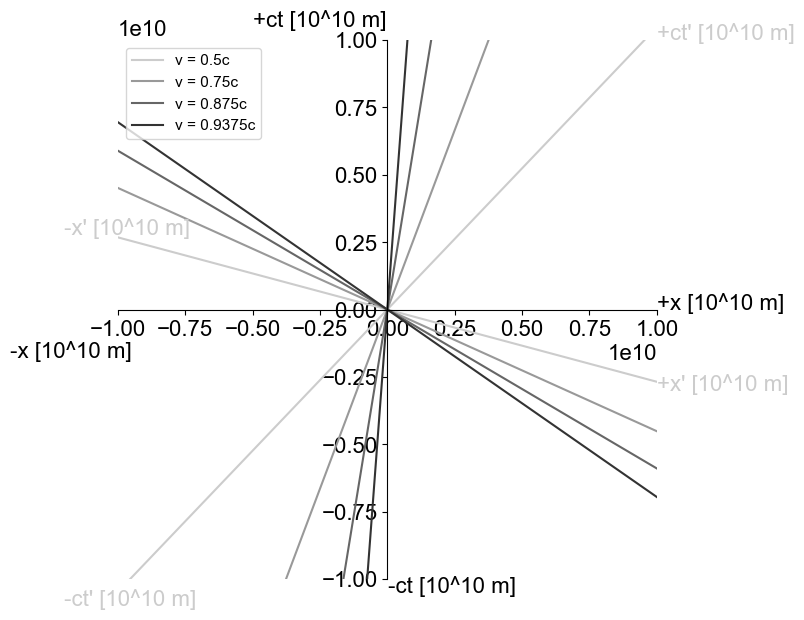

In [17]:
# Plot here
# Set up an array of independent variables x that spans (-1e10, 1e10) m
x = np.linspace(0, 2e10, num=201, endpoint=True) - 1e10

# Make a figure
fig, ax = plt.subplots(figsize=(7,7))

# YOUR CODE HERE: Use ax.plot() to plot the ct' and x' axes below
v4 = 0.5 * constants.c
v5 = 0.75 * constants.c
v6 = 0.875 * constants.c
v7 = 0.9375 * constants.c
#ct and x listed below are ct' and x' -> left out for convenience!
ct4 = ax.plot(x,ctx_ctprime(v4,x), color='0.8', label='v = 0.5c')
x4 = ax.plot(x,ctx_xprime(v4,x), color='0.8')
ct5 = ax.plot(x,ctx_ctprime(v5,x), color='0.6', label='v = 0.75c')
x5 = ax.plot(x,ctx_xprime(v5,x), color='0.6')
ct6 = ax.plot(x,ctx_ctprime(v6,x), color='0.4', label='v = 0.875c')
x6 = ax.plot(x,ctx_xprime(v6,x), color='0.4')
ct7 = ax.plot(x,ctx_ctprime(v7,x), color='0.2', label='v = 0.9375c')
x7 = ax.plot(x,ctx_xprime(v7,x), color='0.2')

# Move the left and bottom "spines" (borders of the plot) to the center
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Take out the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make the two axes have the same scale
ax.set_aspect('equal')

# Set the axes ranges
ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

# YOUR CODE HERE: Use ax.text() to add RED labels to the ct' and x' axes below
ax.text(-0.5e10,1.05e10,'+ct [10^10 m]', color='black')
ax.text(0.001e10,-1.05e10,'-ct [10^10 m]', color='black')
ax.text(1e10,0.001e10,'+x [10^10 m]', color='black')
ax.text(-1.4e10,-0.18e10,'-x [10^10 m]', color='black')
ax.text(1e10,1e10,'+ct\' [10^10 m]', color='0.8')
ax.text(-1.2e10,-1.1e10,'-ct\' [10^10 m]', color='0.8')
ax.text(1e10,-0.3e10,'+x\' [10^10 m]', color='0.8')
ax.text(-1.2e10,0.28e10,'-x\' [10^10 m]', color='0.8')

#Legend
ax.legend(loc='upper left', fontsize='x-small')

As v approaches c, the (x',ct') axes approach the normal (x,ct) axes.  A vertical worldline (ct' axis) shows an object at rest.
Matching up the axes would indicate that frame K' would be at rest relative to frame K.

Below is my work for the equations for both axes.

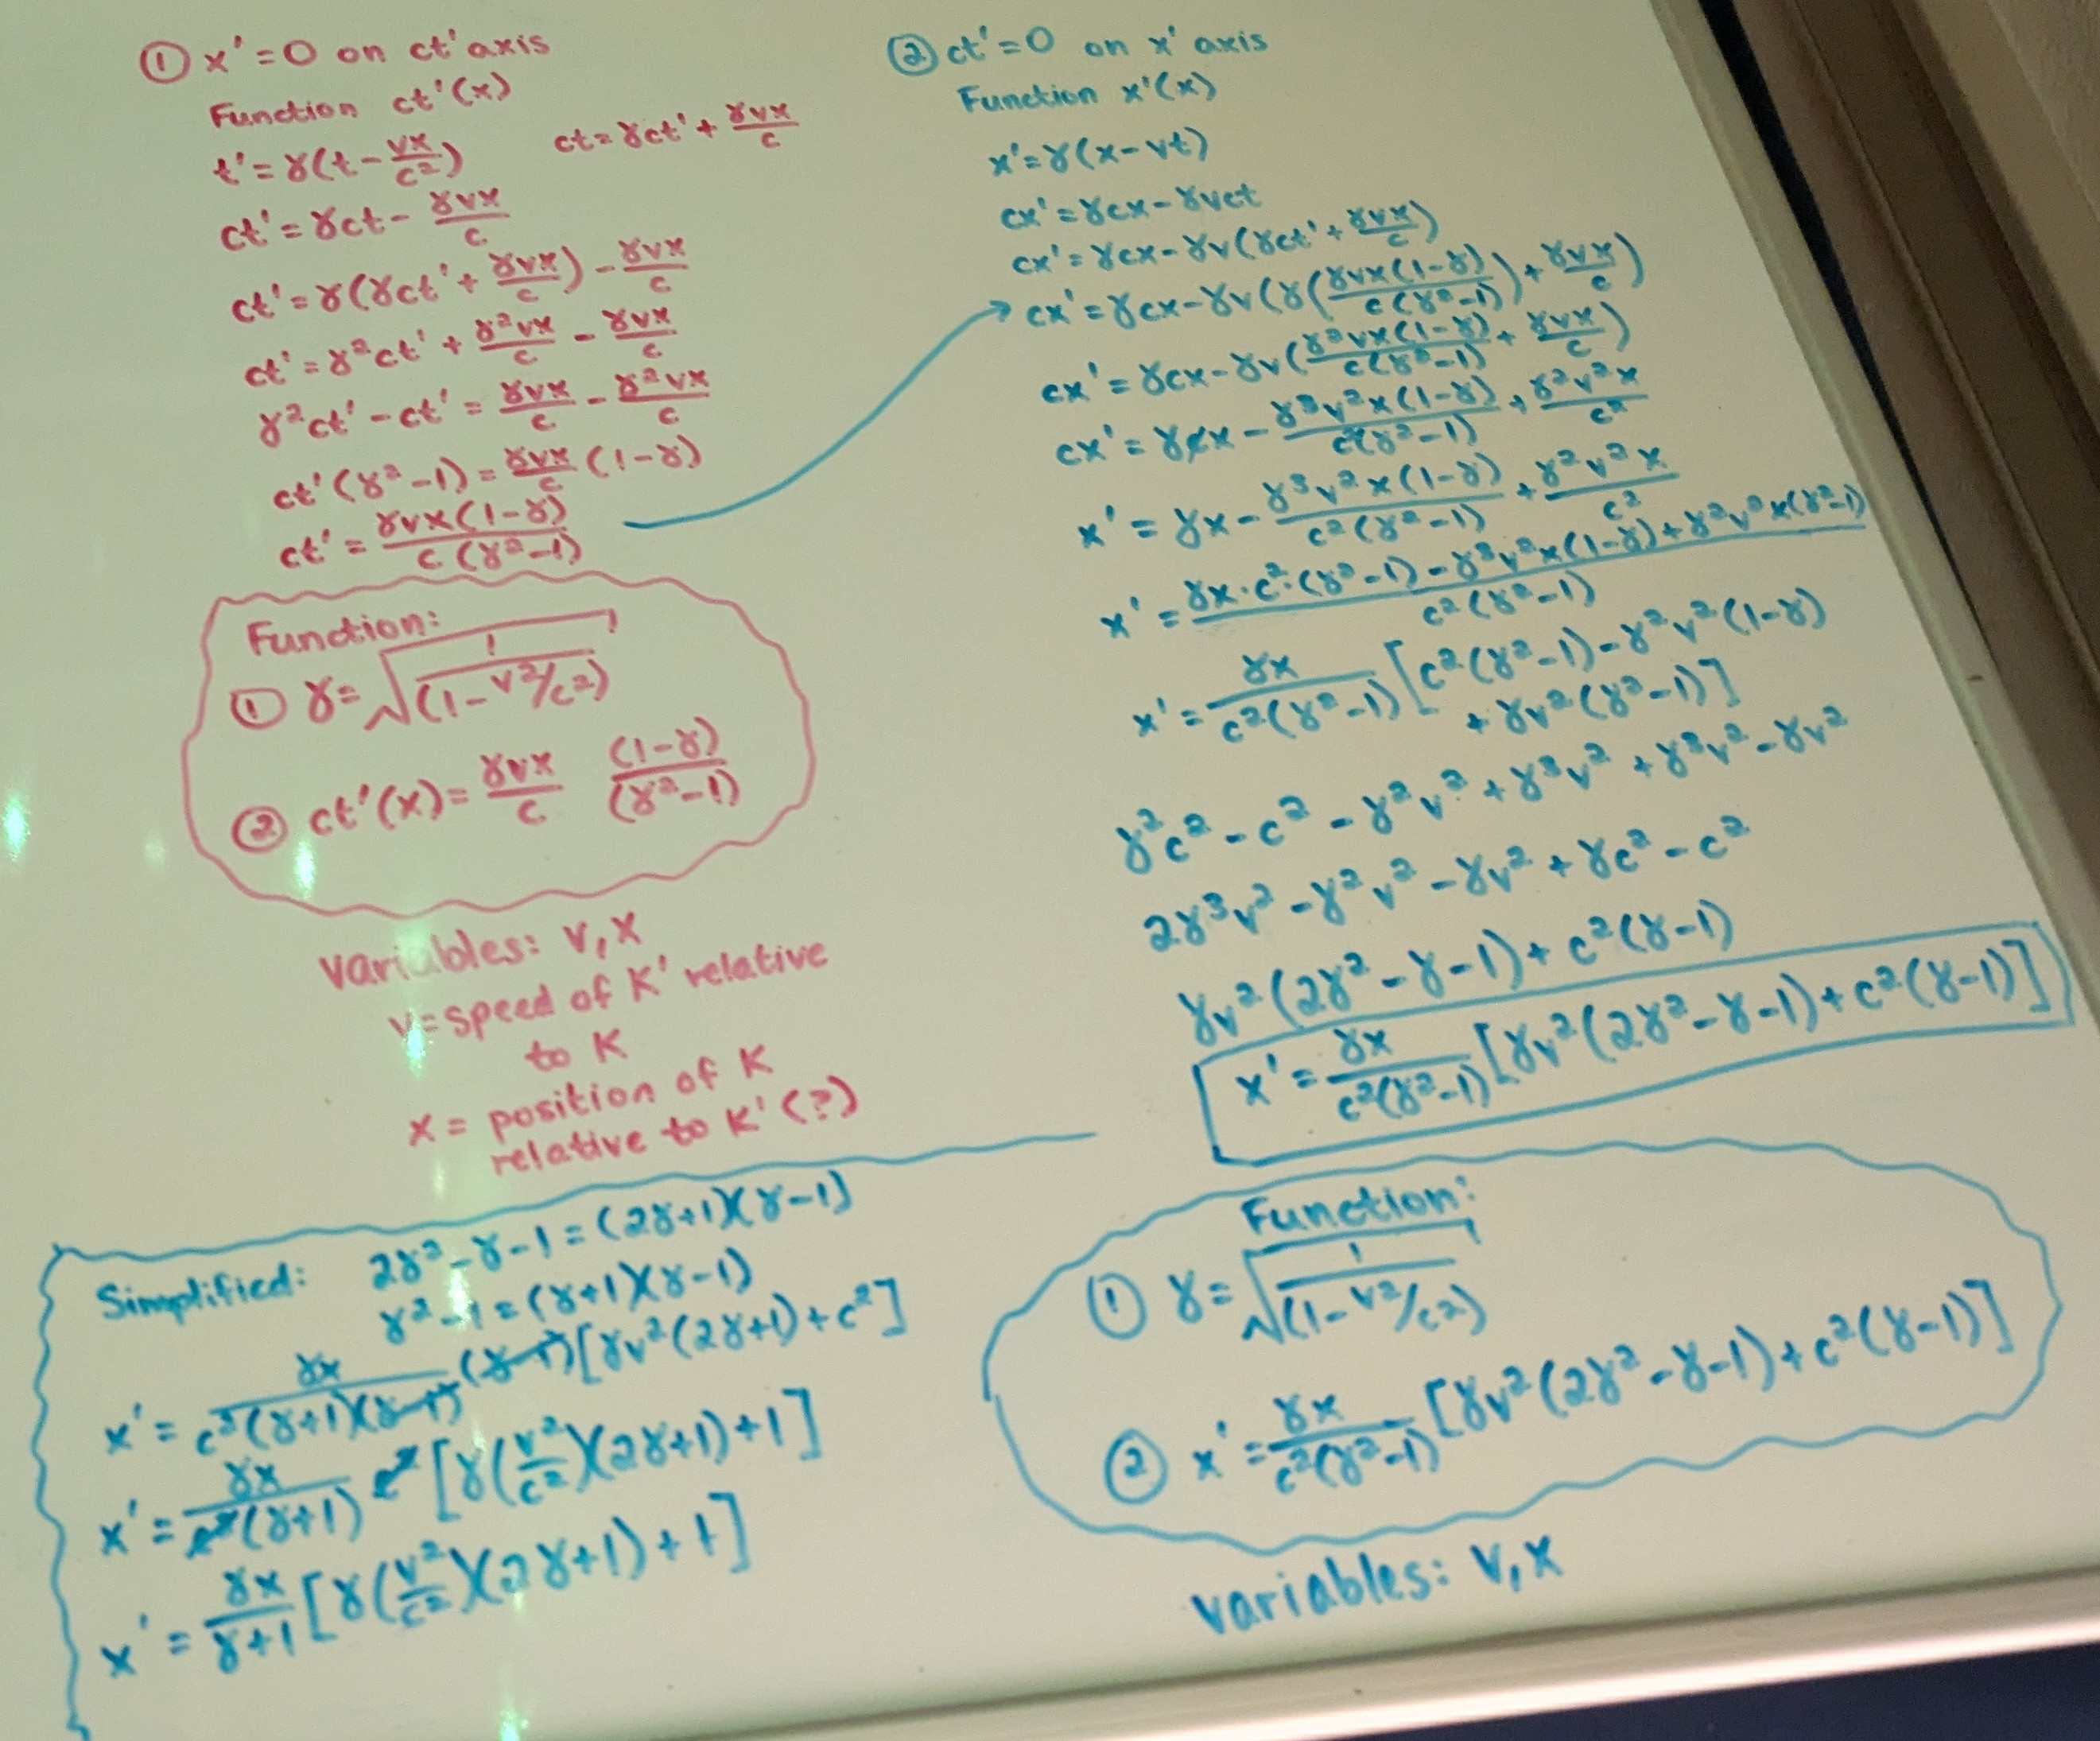